In [1]:
# Basics
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split

# Models
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.naive_bayes import GaussianNB 

#Evaluation metrics
from sklearn import metrics
from sklearn.metrics import matthews_corrcoef

#Learning curve and ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# Warnings
import warnings as ws
ws.filterwarnings('ignore')


TypeError: an integer is required (got type bytes)

In [2]:
# Load Dataset
banknote_dataset = pd.read_csv("BankNote_Authentication.csv")
banknote_dataset.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
banknote_dataset.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


# Decision Tree classification

## DATA PREPROCESSING

In [4]:
X = banknote_dataset.drop(['class'], axis = 1)
X[0:5]

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [5]:
Y = banknote_dataset['class']
Y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

## Normalize

## Training and Testing Data set 

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3, stratify = Y) # train:test ratio 70:30
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.2, random_state=3, stratify = Y) # train:test ratio 80:20
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.1, random_state=3, stratify = Y) # train:test ratio 90:10


## Modelling using Decision Tree Classifier

## Changing MAX Depth

In [7]:
train_accuracy = []
test_accuracy = []
for depth in range(1,10):
    bank_tree = DecisionTreeClassifier(max_depth=depth, random_state=10)
    bank_tree.fit(x_train, y_train)
    train_accuracy.append(bank_tree.score(x_train, y_train))
    test_accuracy.append(bank_tree.score(x_test, y_test))

In [8]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'test_acc':test_accuracy})
frame.head(10)

,max_depth,train_acc,test_acc
0,1,0.847917,0.866505
1,2,0.906250,0.922330
2,3,0.943750,0.949029
3,4,0.980208,0.973301
4,5,0.986458,0.978155
5,6,0.997917,0.987864
6,7,1.000000,0.985437
7,8,1.000000,0.985437
8,9,1.000000,0.985437


No handles with labels found to put in legend.


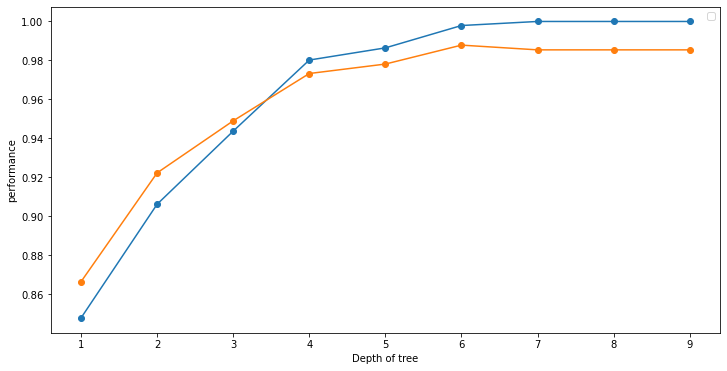

In [9]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['test_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [10]:
bank_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
bank_tree

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [11]:
bank_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [12]:
pred_tree = bank_tree.predict(x_test)
pred_tree[0:10]

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

## Evaluation metrics

### Confusion matrix

In [13]:
from sklearn.metrics import confusion_matrix
import itertools

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[228   1]
 [  1 182]]


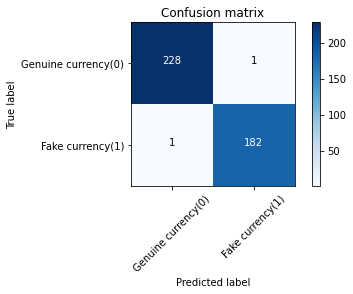

In [15]:
# Compute confusion matrix for train:test ratio 70:30
dt1 = confusion_matrix(y_test,pred_tree)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(dt1, classes=['Genuine currency(0)','Fake currency(1)'],normalize= False,  title='Confusion matrix')

Confusion matrix, without normalization
[[152   1]
 [  0 122]]


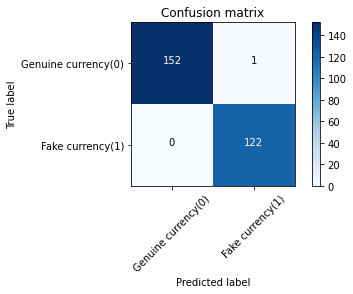

In [16]:
# Compute confusion matrix for train:test ratio 80:20
dt2 = confusion_matrix(y_test1,bank_tree.predict(x_test1))
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(dt2, classes=['Genuine currency(0)','Fake currency(1)'],normalize= False,  title='Confusion matrix')

Confusion matrix, without normalization
[[77  0]
 [ 0 61]]


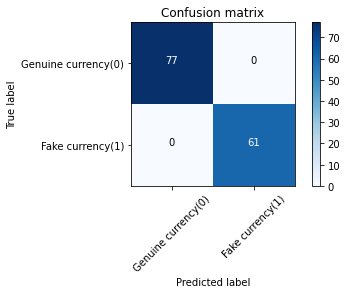

In [17]:
# Compute confusion matrix for train:test ratio 90:10
dt3 = confusion_matrix(y_test2,bank_tree.predict(x_test2))
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(dt3, classes=['Genuine currency(0)','Fake currency(1)'],normalize= False,  title='Confusion matrix')

### Different evaluation parameters

In [18]:
# train:test ratio 70:30
recall = dt1[0,0]/(dt1[0,0]+dt1[0,1])
precision = dt1[0,0] / dt1[0,0] + dt1[1,0]
sensitivity1 = dt1[0,0]/(dt1[0,0]+dt1[0,1])
specificity1 = dt1[1,1]/(dt1[1,0]+dt1[1,1])
fpr = dt1[1,0] / dt1[1,0] + dt1[1,1]
fnr = dt1[0,1] / dt1[0,0] + dt1[0,1]
npv = dt1[1,1] / dt1[1,1] + dt1[0,1]
fdr = dt1[1,0] / dt1[1,0] + dt1[0,0]

print("Accuracy: ", metrics.accuracy_score(y_test, pred_tree)*100)
print("Recall:",recall *100)
print("precision:", precision)
print('Sensitivity : ', sensitivity1 *100 )
print('Specificity : ', specificity1 *100)
print("False positive rate:", fpr)
print("False negative rate:", fnr)
print("Negative Predicted value:", npv)
print("False discovery rate:", fdr)
print("Matthews correlation coefficient: ",matthews_corrcoef(y_test, pred_tree)*100 )

Accuracy:  99.51456310679612
Recall: 99.56331877729258
precision: 2.0
Sensitivity :  99.56331877729258
Specificity :  99.4535519125683
False positive rate: 183.0
False negative rate: 1.0043859649122806
Negative Predicted value: 2.0
False discovery rate: 229.0
Matthews correlation coefficient:  99.01687068986088


In [19]:
# train:test ratio 80:20

yhat = bank_tree.predict(x_test1)
recall = dt2[0,0]/(dt2[0,0]+dt2[0,1])
precision = dt2[0,0] / dt2[0,0] + dt2[1,0]
sensitivity2 = dt2[0,0]/(dt2[0,0]+dt2[0,1])
specificity2 = dt2[1,1]/(dt2[1,0]+dt2[1,1])
fpr = dt2[1,0] / dt2[1,0] + dt2[1,1]
fnr = dt2[0,1] / dt2[0,0] + dt2[0,1]
npv = dt2[1,1] / dt2[1,1] + dt2[0,1]
fdr = dt2[1,0] / dt2[1,0] + dt2[0,0]

print("Accuracy: ", metrics.accuracy_score(y_test1, yhat)*100)
print("Recall:",recall *100)
print("precision:", precision)
print('Sensitivity : ', sensitivity2 *100)
print('Specificity : ', specificity2 *100)
print("False positive rate:", fpr)
print("False negative rate:", fnr)
print("Negative Predicted value:", npv)
print("False discovery rate:", fdr)
print("Matthews correlation coefficient: ",matthews_corrcoef(y_test1, yhat)*100 )

Accuracy:  99.63636363636364
Recall: 99.34640522875817
precision: 1.0
Sensitivity :  99.34640522875817
Specificity :  100.0
False positive rate: nan
False negative rate: 1.006578947368421
Negative Predicted value: 2.0
False discovery rate: nan
Matthews correlation coefficient:  99.2666665488999


In [20]:
# train:test ratio 90:10
yhat_test = bank_tree.predict(x_test2)
recall = dt3[0,0]/(dt3[0,0]+dt3[0,1])
precision = dt3[0,0] / dt3[0,0] + dt3[1,0]
sensitivity3 = dt3[0,0]/(dt3[0,0]+dt3[0,1])
specificity3 = dt3[1,1]/(dt3[1,0]+dt3[1,1])
fpr = dt3[1,0] / dt3[1,0] + dt3[1,1]
fnr = dt3[0,1] / dt3[0,0] + dt3[0,1]
npv = dt3[1,1] / dt3[1,1] + dt3[0,1]
fdr = dt3[1,0] / dt3[1,0] + dt3[0,0]

print("Accuracy: ", metrics.accuracy_score(y_test2, yhat_test)*100)
print("Recall:",recall *100)
print("precision:", precision)
print('Sensitivity : ', sensitivity2 *100)
print('Specificity : ', specificity2 *100)
print("False positive rate:", fpr)
print("False negative rate:", fnr)
print("Negative Predicted value:", npv)
print("False discovery rate:", fdr)
print("Matthews correlation coefficient: ",matthews_corrcoef(y_test2, yhat_test)*100 )

Accuracy:  100.0
Recall: 100.0
precision: 1.0
Sensitivity :  99.34640522875817
Specificity :  100.0
False positive rate: nan
False negative rate: 0.0
Negative Predicted value: 1.0
False discovery rate: nan
Matthews correlation coefficient:  100.0


## ROC Curve

In [21]:
probs = bank_tree.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr,tpr)

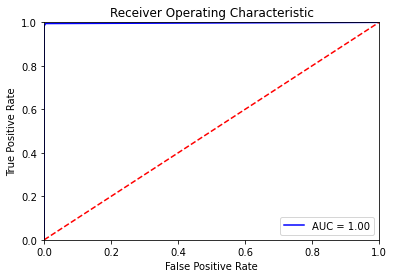

In [22]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Data Visualization

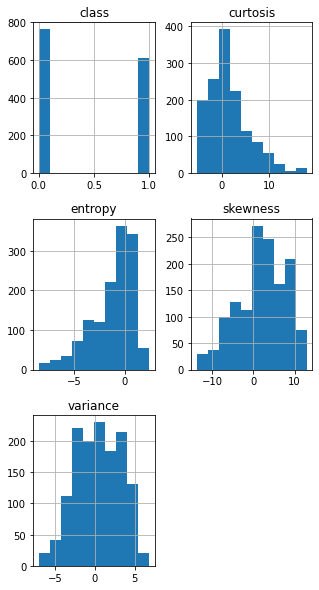

In [23]:
banknote_dataset.hist(figsize = (5,10))
plt.show()

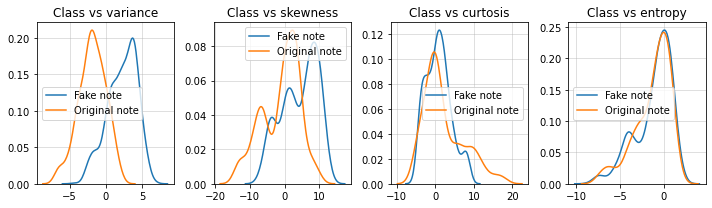

In [24]:
col_names = banknote_dataset.drop('class', axis = 1).columns.tolist()

plt.figure(figsize = (10,3))
i = 0
for col in col_names:
    plt.subplot(1,4,i+1)
    plt.grid(True, alpha =0.5)
    sns.kdeplot(banknote_dataset[col][banknote_dataset['class'] ==0], label = 'Fake note')
    sns.kdeplot(banknote_dataset[col][banknote_dataset['class'] ==1], label = 'Original note')
    plt.title('Class vs ' + col)
    plt.tight_layout()
    i+=1
plt.show()

In [25]:
from sklearn.externals.six import StringIO

import graphviz
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 


ModuleNotFoundError: No module named 'sklearn.externals.six'

In [ ]:
!conda install -c conda-forge pydotplus -y
import pydotplus

In [ ]:
tree.export_graphviz(bank_tree, out_file = 'tree.dot',max_depth=3,filled=True)
tree

In [ ]:
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

In [ ]:
filename = "tree.png"
img = plt.imread(filename)
plt.figure(figsize=(30, 40))
plt.imshow(img,interpolation='nearest')

# Naive bayes classification

## Preprocessing

In [ ]:
X = banknote_dataset.drop('class', axis = 1)
print(X[0:5])

In [ ]:
Y = banknote_dataset['class']
print(Y[0:5])

## Training and Testing Data set


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=3) # train:test ratio 70:30
train1_x, test1_x, train1_y, test1_y = train_test_split(X, Y, test_size=0.2, random_state=3) # train:test ratio 80:20
train2_x, test2_x, train2_y, test2_y = train_test_split(X, Y, test_size=0.1, random_state=3) # train:test ratio 90:10

## Building a model

In [ ]:
bank_gnb = GaussianNB() 
bank_gnb.fit(train_x, train_y) 
yhat = bank_gnb.predict(test_x) 
yhat[0:10]

In [ ]:
bank_gnb.fit(train1_x,train1_y)
yhat1 = bank_gnb.predict(test1_x)
yhat1[0:10]

## Evaluation metrics

## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Compute confusion matrix for train:test ratio 70:30
nb1 = confusion_matrix(test_y,yhat)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(nb1,classes=['Genuine currency(0)','Fake currency(1)'],normalize= False,  title='Confusion matrix')

In [ ]:
# Compute confusion matrix for train:test ratio 80:20
nb2 = confusion_matrix(test1_y,yhat1)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(nb2, classes=['Genuine currency(0)','Fake currency(1)'],normalize= False,  title='Confusion matrix')

In [ ]:
# Compute confusion matrix for train:test ratio 90:10
nb3 = confusion_matrix(test2_y,yhat2)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(nb3, classes=['Genuine currency(0)','Fake currency(1)'],normalize= False,  title='Confusion matrix')

### Different Evaluation metrics

In [ ]:
# train:test ratio 70:30
recall = nb1[0,0]/(nb1[0,0]+nb1[0,1])
precision = nb1[0,0] / nb1[0,0] + nb1[1,0]
sensitivity1 = nb1[0,0]/(nb1[0,0]+nb1[0,1])
specificity1 = nb1[1,1]/(nb1[1,0]+nb1[1,1])
fpr = nb1[1,0] / nb1[1,0] + nb1[1,1]
fnr = nb1[0,1] / nb1[0,0] + nb1[0,1]
npv = nb1[1,1] / nb1[1,1] + nb1[0,1]
fdr = nb1[1,0] / nb1[1,0] + nb1[0,0]

print("Accuracy: ", metrics.accuracy_score(test_y, yhat)*100)
print("Recall:",recall *100)
print("precision:", precision)
print('Sensitivity : ', sensitivity1 *100 )
print('Specificity : ', specificity1 *100)
print("False positive rate:", fpr)
print("False negative rate:", fnr)
print("Negative Predicted value:", npv)
print("False discovery rate:", fdr)
print("Matthews correlation coefficient: ",matthews_corrcoef(test_y, yhat)*100 )

In [ ]:
# train:test ratio 80:20
recall = nb2[0,0]/(nb2[0,0]+nb2[0,1])
precision = nb2[0,0] / nb2[0,0] + nb2[1,0]
sensitivity1 = nb2[0,0]/(nb2[0,0]+nb2[0,1])
specificity1 = nb2[1,1]/(nb2[1,0]+nb2[1,1])
fpr = nb2[1,0] / nb2[1,0] + nb2[1,1]
fnr = nb2[0,1] / nb2[0,0] + nb2[0,1]
npv = nb2[1,1] / nb2[1,1] + nb2[0,1]
fdr = nb2[1,0] / nb2[1,0] + nb2[0,0]

print("Accuracy: ", metrics.accuracy_score(test1_y, yhat1)*100)
print("Recall:",recall *100)
print("precision:", precision)
print('Sensitivity : ', sensitivity1 *100 )
print('Specificity : ', specificity1 *100)
print("False positive rate:", fpr)
print("False negative rate:", fnr)
print("Negative Predicted value:", npv)
print("False discovery rate:", fdr)
print("Matthews correlation coefficient: ",matthews_corrcoef(test1_y, yhat1)*100 )

In [ ]:
# train:test ratio 90:10
recall = nb3[0,0]/(nb3[0,0]+nb3[0,1])
precision = nb3[0,0] / nb3[0,0] + nb3[1,0]
sensitivity1 = nb3[0,0]/(nb3[0,0]+nb3[0,1])
specificity1 = nb3[1,1]/(nb3[1,0]+nb3[1,1])
fpr = nb3[1,0] / nb3[1,0] + nb3[1,1]
fnr = nb3[0,1] / nb3[0,0] + nb3[0,1]
npv = nb3[1,1] / nb3[1,1] + nb3[0,1]
fdr = nb3[1,0] / nb3[1,0] + nb3[0,0]

print("Accuracy: ", metrics.accuracy_score(test2_y, yhat2)*100)
print("Recall:",recall *100)
print("precision:", precision)
print('Sensitivity : ', sensitivity1 *100 )
print('Specificity : ', specificity1 *100)
print("False positive rate:", fpr)
print("False negative rate:", fnr)
print("Negative Predicted value:", npv)
print("False discovery rate:", fdr)
print("Matthews correlation coefficient: ",matthews_corrcoef(test2_y, yhat2)*100 )

## ROC curve

In [ ]:
probs = bank_gnb.predict_proba(test_x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_y, preds)
roc_auc = metrics.auc(fpr, tpr)

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Data visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (5,10))
ax = fig.add_subplot(111, projection='3d')
xs = banknote_dataset['variance']
ys = banknote_dataset['skewness']
zs = banknote_dataset['entropy']
ax.scatter(xs, ys, zs, c=banknote_dataset['class'], marker = 'o')
ax.set_xlabel('variance')
ax.set_ylabel('skewness')
ax.set_zlabel('entropy')
plt.show()

In [ ]:
fig = plt.figure(figsize = (5,10))
ax = fig.add_subplot(111, projection='3d')
xs = banknote_dataset['skewness']
ys = banknote_dataset['curtosis']
zs = banknote_dataset['variance']
ax.scatter(xs, ys, zs, c=banknote_dataset['class'])
ax.set_xlabel('skew')
ax.set_ylabel('curtosis')
ax.set_zlabel('variance')
plt.show()

## Learning curve, Scalability and performance of model

In [ ]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [ ]:
X = banknote_dataset[['variance', 'skewness', 'curtosis', 'entropy']]
y = banknote_dataset['class']

In [ ]:
## Train_test ratio 70:30

fig, axes = plt.subplots(3, 2, figsize=(10, 15))
title = "Learning Curves (Naive Bayes)"
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)
estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)


title = r"Learning Curves (Decision Tree)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

estimator = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

In [ ]:
## Train_test ratio 80:20

fig, axes = plt.subplots(3, 2, figsize=(10, 15))
title = "Learning Curves (Naive Bayes)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)


title = r"Learning Curves (Decision Tree)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

In [ ]:
## Train-test ratio 90:10

fig, axes = plt.subplots(3, 2, figsize=(10, 15))
title = "Learning Curves (Naive Bayes)"
cv = ShuffleSplit(n_splits=100, test_size=0.1, random_state=0)
estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)


title = r"Learning Curves (Decision Tree)"
cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

estimator = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)